In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-nhl-player-salaries/test_salaries.csv
/kaggle/input/predict-nhl-player-salaries/train.csv
/kaggle/input/predict-nhl-player-salaries/test.csv


In [5]:
train_df = pd.read_csv("../input/predict-nhl-player-salaries/train.csv")
test_df = pd.read_csv("../input/predict-nhl-player-salaries/test.csv")
test_salaries_df = pd.read_csv("../input/predict-nhl-player-salaries/test_salaries.csv")

In [6]:
print("Training set: ",train_df.head())
print("\n\nTest set :", test_df.head())
print("\n\nTest salaries :", test_salaries_df.head())

Training set:      Salary      Born          City Pr/St Cntry  Nat  Ht   Wt   DftYr  DftRd  \
0   925000  97-01-30  Sainte-Marie    QC   CAN  CAN  74  190  2015.0    1.0   
1  2250000  93-12-21        Ottawa    ON   CAN  CAN  74  207  2012.0    1.0   
2  8000000  88-04-16      St. Paul    MN   USA  USA  72  218  2006.0    1.0   
3  3500000  92-01-07        Ottawa    ON   CAN  CAN  77  220  2010.0    1.0   
4  1750000  94-03-29       Toronto    ON   CAN  CAN  76  217  2012.0    1.0   

   ...  PEND  OPS  DPS   PS     OTOI Grit   DAP   Pace    GS  GS/G  
0  ...   1.0  0.0 -0.2 -0.2    40.03    1   0.0  175.7  -0.4 -0.38  
1  ...  98.0 -0.2  3.4  3.2  2850.59  290  13.3  112.5  14.1  0.18  
2  ...  70.0  3.7  1.3  5.0  2486.75  102   6.6  114.8  36.8  0.57  
3  ...  22.0  0.0  0.4  0.5  1074.41  130  17.5  105.1   5.9  0.20  
4  ...  68.0 -0.1  1.4  1.3  3459.09  425   8.3   99.5  21.8  0.27  

[5 rows x 154 columns]


Test set :        Born           City Pr/St Cntry  Nat  Ht   Wt   DftY

In [7]:
train_df.describe()

,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,6.120000e+02,612.00000,612.000000,512.000000,512.000000,512.000000,612.000000,612.000000,612.000000,612.000000,...,611.000000,612.000000,612.000000,612.000000,611.000000,612.000000,612.000000,611.000000,611.000000,610.000000
mean,2.264509e+06,72.98366,200.745098,2008.787109,2.703125,66.710938,51.566993,7.743464,13.006536,7.235294,...,48.029460,1.309804,1.331046,2.643301,2051.150540,131.632353,9.379739,108.858592,22.263830,0.339082
std,2.236340e+06,2.08016,14.952420,4.440032,1.983728,63.012458,29.110441,8.629748,12.624371,7.462741,...,33.466878,2.038557,1.386627,2.866741,1153.020098,104.257159,8.010665,8.783519,21.991382,0.296025
min,5.750000e+05,67.00000,160.000000,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.700000,-0.200000,-1.200000,33.510000,0.000000,0.000000,77.600000,-4.300000,-0.810000
25%,7.425000e+05,72.00000,190.000000,2006.000000,1.000000,15.000000,24.000000,1.000000,2.000000,1.000000,...,16.500000,0.000000,0.200000,0.200000,945.665000,46.750000,4.800000,104.450000,2.950000,0.142500
50%,9.250000e+05,73.00000,200.000000,2010.000000,2.000000,45.000000,63.500000,5.000000,9.000000,5.000000,...,48.000000,0.400000,1.000000,1.700000,2490.380000,118.000000,7.550000,108.900000,16.200000,0.305000
75%,3.500000e+06,74.00000,210.000000,2012.000000,4.000000,104.000000,78.000000,12.000000,20.000000,11.000000,...,74.000000,2.100000,1.900000,4.400000,3022.865000,195.250000,12.000000,113.900000,35.250000,0.530000
max,1.380000e+07,81.00000,265.000000,2016.000000,9.000000,279.000000,82.000000,44.000000,63.000000,36.000000,...,137.000000,10.500000,7.200000,12.900000,3527.100000,622.000000,61.000000,175.700000,99.200000,1.260000


In [8]:
train_df.shape
# 612 players
# 153 predictor variables and 1 target (salary) variable

(612, 154)

In [9]:
train_df.iloc[:,:20]

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,600000,92-09-26,Denver,CO,USA,USA,73,201,2011.0,3.0,82.0,R,Shore,Nick,C,L.A,70,6,11,6
608,9000000,85-01-21,Madison,WI,USA,USA,74,206,2003.0,1.0,7.0,L,Suter,Ryan,D,MIN,82,9,31,10
609,4250000,87-03-30,Montreal,QC,CAN,CAN,73,205,2005.0,2.0,35.0,L,Vlasic,Marc-Edouard,D,S.J,75,6,22,14
610,7000000,82-10-31,Kladno,NaN,CZE,CZE,71,196,2001.0,3.0,71.0,L,Plekanec,Tomas,C,MTL,78,10,18,9


## Data Cleaning
<h3> Imputation, Removing Duplicates, Encoding and Segregation  </h3>

#### Finding the columns with Missing values

In [10]:
train_missing_values = train_df.columns[train_df.isnull().any()].to_list()
test_missing_values = test_df.columns[test_df.isnull().any()].to_list()

print("Columns with missing values in the Training set: \n", train_missing_values)
print("\nColumns with missing values in the Test set: \n", test_missing_values)

print("\n\nNumber of columns with missing values in train set: \t", len(train_missing_values))
print("\nNumber of columns with missing values in test set: \t", len(test_missing_values))

Columns with missing values in the Training set: 
 ['Pr/St', 'DftYr', 'DftRd', 'Ovrl', 'TOIX', 'TOI%', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60', 'A/60', 'Diff/60', 'iCF', 'iFF', 'iSF', 'ixG', 'iSCF', 'iRB', 'iRS', 'iDS', 'sDist.1', 'Pass', 'iHF.1', 'iHA', 'iHDf', 'iGVA.1', 'iTKA.1', 'iBLK.1', 'BLK%', 'iFOW.1', 'iFOL.1', '%FOT', 'iPENT', 'iPEND', 'CF', 'CA', 'FF', 'FA', 'SF', 'SA', 'xGF', 'xGA', 'SCF', 'SCA', 'GF', 'GA', 'RBF', 'RBA', 'RSF', 'RSA', 'FOW', 'FOL', 'HF', 'HA', 'GVA', 'TKA', 'PENT', 'PEND', 'OTOI', 'Pace', 'GS', 'GS/G']

Columns with missing values in the Test set: 
 ['Pr/St', 'DftYr', 'DftRd', 'Ovrl', 'iCF', 'iFF', 'iSF', 'iRB', 'iDS', 'sDist.1', 'iHA', 'iHDf']


Number of columns with missing values in train set: 	 63

Number of columns with missing values in test set: 	 12


Looks like a lot of columns (63 in number) in the training set have missing values. We need to fix this now.

In [11]:
test_salaries_df.isnull().sum() ## no null values in our target dataset

Salary    0
dtype: int64

In [12]:
train_salary_df = train_df[['Salary']]
train_predictor_df = train_df.loc[:, train_df.columns != 'Salary']
all_data_predictors = train_predictor_df.append(test_df) # concatenating train and test set for finding correct median for imputation 
all_data_predictors.shape

(874, 153)

In [13]:
all_data_predictors.tail()

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
257,97-03-11,Kingston,ON,CAN,CAN,74,219,2011.0,2.0,54.0,...,9.0,0.1,0.8,0.9,858.75,55,6.3,105.3,2.6,0.12
258,95-01-30,Denver,CO,USA,USA,75,205,2009.0,2.0,44.0,...,5.0,-0.2,0.1,-0.1,588.65,29,13.0,99.6,0.4,0.03
259,97-06-18,Toronto,ON,CAN,CAN,78,210,2011.0,1.0,9.0,...,97.0,4.8,4.7,9.5,3133.83,226,2.7,113.6,65.1,0.80
260,98-09-21,Hilton Head Isl.,SC,USA,USA,72,181,2013.0,1.0,30.0,...,59.0,2.8,1.4,4.2,3076.20,223,7.9,110.8,43.4,0.57
261,91-03-18,Cherry Hill,NJ,USA,USA,74,204,2005.0,1.0,2.0,...,56.0,1.5,1.0,2.5,2454.71,169,13.6,118.0,29.1,0.47


#### Imputing missing values

<br>1. <b>Pr/St </b>: Pr.St tells us which state the player belongs to (Canada/US) thus for the rest of the players with missing values we impute with 'INT' i.e. International player
<br>2. All the rest columns are numerical so they can be simply imputed with their median

<b>Pr/St imputation</b>

In [14]:
train_df['Pr/St'].fillna('INT', inplace=True)

In [15]:
train_df['Pr/St'].head(10)

0     QC
1     ON
2     MN
3     ON
4     ON
5     ON
6    INT
7     ON
8     ON
9     ON
Name: Pr/St, dtype: object

In [16]:
test_df['Pr/St'].fillna('INT', inplace=True)
test_df['Pr/St'].head(10)

0     NY
1    INT
2     MO
3    INT
4     NY
5     MN
6    INT
7     ON
8     AB
9    INT
Name: Pr/St, dtype: object

In [17]:
all_data_predictors['Pr/St'].fillna('INT', inplace=True)

#### Imputing with median

In [18]:
all_data_predictors.median()

Ht         73.00
Wt        200.00
DftYr    2010.00
DftRd       2.00
Ovrl       47.00
          ...   
Grit      114.00
DAP         7.60
Pace      109.20
GS         15.70
GS/G        0.31
Length: 143, dtype: float64

In [19]:
all_data_predictors.fillna(all_data_predictors.median(), inplace=True)

In [20]:
all_data_predictors.columns[all_data_predictors.isnull().any()].to_list()

[]

#### Filled all missing values successfully!

#### Checking for duplicates:

In [21]:
duplicate_df = train_df[train_df['First Name'].duplicated()==True]
x = duplicate_df[duplicate_df['First Name']=='David']
x[['First Name', 'Last Name']]

,First Name,Last Name
27,David,Perron
144,David,Warsofsky
160,David,Schlemko
198,David,Backes
323,David,Desharnais
487,David,Savard


In [22]:
## Concatenate First Name and Last name and look for Duplicates
all_data_predictors['Full_Name'] = all_data_predictors['First Name'] + " " + all_data_predictors['Last Name']
all_data_predictors = all_data_predictors.drop('First Name', 1)
all_data_predictors = all_data_predictors.drop('Last Name', 1)

In [23]:
all_data_predictors.shape

(874, 152)

In [24]:
all_data_predictors[all_data_predictors['Full_Name'].duplicated()==True]
## No duplicates with respect to name

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Full_Name


#### Encoding Categorical Variables - Integer Encoding
I have not done one-hot encoding of Position or Team variables since the categories are large in number and will lead to consumption of a lot of memory and will generate too deep trees, thus performing worse than usual.

In [25]:
all_data_predictors['Position'].nunique()

20

In [26]:
all_data_predictors['Team'].nunique()

78

In [27]:
all_data_predictors['Position'] = all_data_predictors['Position'].astype('category')
all_data_predictors['Team'] = all_data_predictors['Team'].astype('category')

all_data_predictors['Position'] = all_data_predictors['Position'].cat.codes
all_data_predictors['Team'] = all_data_predictors['Team'].cat.codes

In [28]:
all_data_predictors['Position']

0       7
1       7
2      15
3       7
4      15
       ..
257     7
258     0
259     7
260    13
261    18
Name: Position, Length: 874, dtype: int8

#### Forming the 'Age' variable
1. The Age variable would be the difference of when the player was born till when the player was drafted in NHL.
<br> 
2. Also, I would consider the month variable because in Canada, it is a common quoted fact that if a player is born early in the year then they have a development advantage as compared to kids born later in the same year. 

In [29]:
all_data_predictors['Born']

0      97-01-30
1      93-12-21
2      88-04-16
3      92-01-07
4      94-03-29
         ...   
257    97-03-11
258    95-01-30
259    97-06-18
260    98-09-21
261    91-03-18
Name: Born, Length: 874, dtype: object

In [30]:
x= '97-01-30'
x.split('-')[2]

def get_birth_year(date):
    year = date.split('-')[0]
    if int(year) > 30:
        year = "19"+year
    else:
        #print(year)
        year = "20"+year
    return year

def get_birth_month(date):
    month = date.split('-')[1]
    return month

all_data_predictors['Birth_Year'] = all_data_predictors['Born'].apply(lambda x: get_birth_year(x))
all_data_predictors['Birth_Year'] = all_data_predictors['Birth_Year'].astype(int)

all_data_predictors['Birth_Month'] = all_data_predictors['Born'].apply(lambda x: get_birth_month(x))

print("Oldest player in the dataset born in: ", min(all_data_predictors['Birth_Year']))
print("Youngest player in the dataset born in: ", max(all_data_predictors['Birth_Year']))

Oldest player in the dataset born in:  1972
Youngest player in the dataset born in:  2001


In [31]:
all_data_predictors = all_data_predictors.drop('Born', 1)
all_data_predictors.shape

(874, 153)

In [32]:
all_data_predictors['Age when Drafted'] = all_data_predictors['DftYr'] - all_data_predictors['Birth_Year']
all_data_predictors['Age when Drafted']

0      18.0
1      19.0
2      18.0
3      18.0
4      18.0
       ... 
257    14.0
258    14.0
259    14.0
260    15.0
261    14.0
Name: Age when Drafted, Length: 874, dtype: float64

In [33]:
print("Player {} was drafted at a maximum age of {} years".format(all_data_predictors['Full_Name'][all_data_predictors['Age when Drafted']==max(all_data_predictors['Age when Drafted'])].iloc[0] ,int(max(all_data_predictors['Age when Drafted']))))
print("Player {} was drafted at a minimum age of {} years".format(all_data_predictors['Full_Name'][all_data_predictors['Age when Drafted']==min(all_data_predictors['Age when Drafted'])].iloc[0] ,int(min(all_data_predictors['Age when Drafted']))))

Player Chris Kunitz was drafted at a maximum age of 31 years
Player Liam O'Brien was drafted at a minimum age of 12 years


## Final Cleaned Dataset

In [34]:
all_data_predictors.head(10)

,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,...,OTOI,Grit,DAP,Pace,GS,GS/G,Full_Name,Birth_Year,Birth_Month,Age when Drafted
0,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,...,40.03,1,0.0,175.7,-0.4,-0.38,Thomas Chabot,1997,01,18.0
1,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,...,2850.59,290,13.3,112.5,14.1,0.18,Cody Ceci,1993,12,19.0
2,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,...,2486.75,102,6.6,114.8,36.8,0.57,Kyle Okposo,1988,04,18.0
3,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,...,1074.41,130,17.5,105.1,5.9,0.20,Erik Gudbranson,1992,01,18.0
4,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,...,3459.09,425,8.3,99.5,21.8,0.27,Tom Wilson,1994,03,18.0
5,Strathroy,ON,CAN,CAN,70,192,1997.0,6.0,156.0,L,...,3069.81,150,4.5,107.4,20.8,0.26,Brian Campbell,1979,05,18.0
6,Stockholm,INT,SWE,SWE,71,185,2009.0,2.0,53.0,L,...,113.46,1,0.0,89.8,0.6,0.18,Anton Rodin,1990,11,19.0
7,Toronto,ON,CAN,CAN,70,183,2010.0,2.0,47.0,R,...,1261.25,28,12.0,106.3,6.2,0.21,Evan Rodrigues,1993,07,17.0
8,Scarborough,ON,CAN,CAN,72,214,2010.0,2.0,42.0,R,...,2250.18,138,18.5,101.0,2.0,0.04,Devante Smith-Pelly,1992,06,18.0
9,Petawawa,ON,CAN,CAN,68,178,2011.0,7.0,201.0,L,...,373.48,13,9.0,101.9,2.1,0.21,Matthew Peca,1993,04,18.0


In [35]:
train_df = all_data_predictors.iloc[:612,:]
test_df = all_data_predictors.iloc[612:, :]

In [36]:
train_df.shape

(612, 154)

In [37]:
test_df.shape

(262, 154)

In [38]:
all_data_salaries = train_salary_df.append(test_salaries_df)

all_data = all_data_predictors
all_data['Salary'] = all_data_salaries
all_data.shape

(874, 155)

## Data Exploration and Visualization

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

**Number of Players from each country**

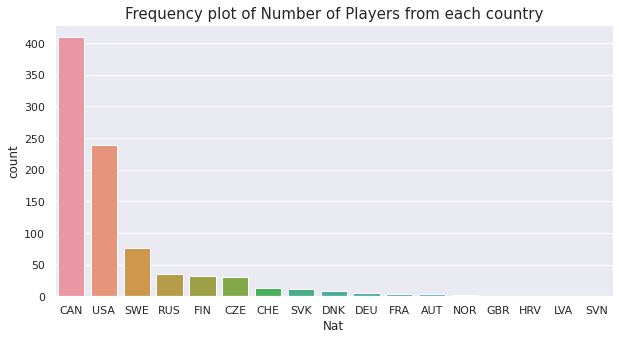

In [40]:
fig = plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
ax = sns.countplot(x=all_data_predictors['Nat'],
             order = all_data_predictors['Nat'].value_counts().index).set_title('Frequency plot of Number of Players from each country', size=15)
plt.show()

**Age distribution**

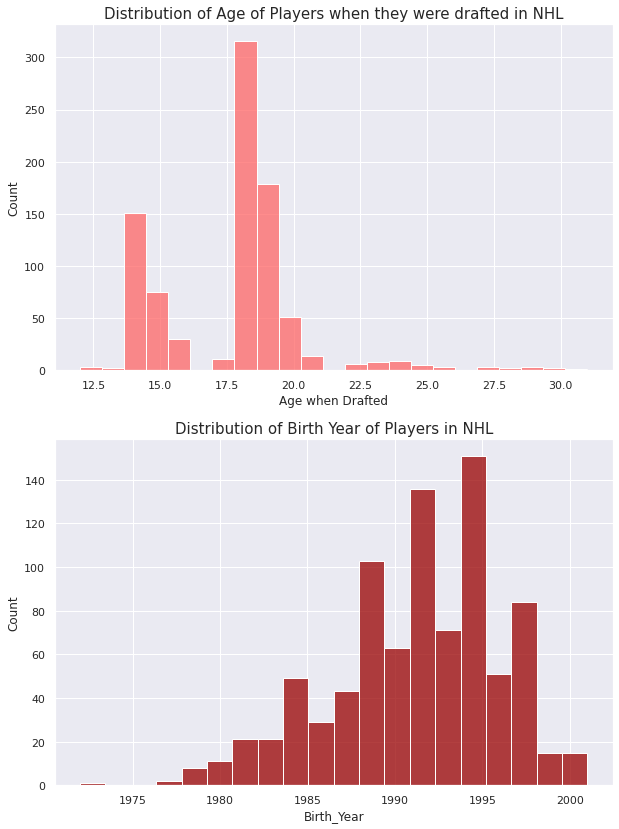

In [41]:
fig, axis = plt.subplots(2, 1, figsize=(10,14), squeeze=False)
ax = sns.histplot(all_data_predictors['Age when Drafted'], color='#ff6666', ax=axis[0][0]).set_title('Distribution of Age of Players when they were drafted in NHL', size=15)
ax2 = sns.histplot(all_data_predictors['Birth_Year'], color='#990000', ax=axis[1][0]).set_title('Distribution of Birth Year of Players in NHL', size=15)

### Let's see who are the oldest and youngest players in 2016/2017 NHL and compare their salaries

In [42]:
oldest_players = all_data_predictors['Full_Name'][all_data_predictors['Birth_Year']<1980]
oldest_players

5       Brian Campbell
131       Jaromir Jagr
243        Zdeno Chara
310        Mark Streit
361       Chris Kunitz
366       Joe Thornton
378    Michal Rozsival
392      Andrei Markov
418       Marian Hossa
551       Brian Gionta
604    Patrick Marleau
Name: Full_Name, dtype: object

In [43]:
youngest_players = all_data_predictors['Full_Name'][all_data_predictors['Birth_Year']>1999]
youngest_players

1            Jakub Vrana
36         Jacob Larsson
40     Evgeny Svechnikov
76            Timo Meier
107      Kasperi Kapanen
145      Andreas Englund
149    Vladislav Kamenev
163       Connor McDavid
174          Kyle Connor
192         Denis Malgin
198     Rasmus Andersson
240         Jared McCann
243         Sonny Milano
247      Gustav Forsling
253         Noah Hanifin
Name: Full_Name, dtype: object

In [57]:
oldest_players_salaries = []
youngest_players_salaries = []

for o in oldest_players:
    in_thousands = (all_data['Salary'][all_data['Full_Name']==o].iloc[0])/1000
    oldest_players_salaries.append(in_thousands)

for y in youngest_players:
    in_thousands = (all_data['Salary'][all_data['Full_Name']==y].iloc[0])/1000
    youngest_players_salaries.append(in_thousands)

print("Oldest player salaries: (in thousands)\n", oldest_players_salaries)
print("\n\nYoungest player salariess: (in thousands)\n", youngest_players_salaries)

Oldest player salaries: (in thousands)
 [1500.0, 4000.0, 5000.0, 4000.0, 3550.0, 6750.0, 600.0, 4250.0, 4000.0, 3250.0, 6500.0]


Youngest player salariess: (in thousands)
 [925.0, 925.0, 925.0, 925.0, 925.0, 742.5, 742.5, 925.0, 925.0, 640.0, 742.5, 925.0, 925.0, 767.5, 925.0]


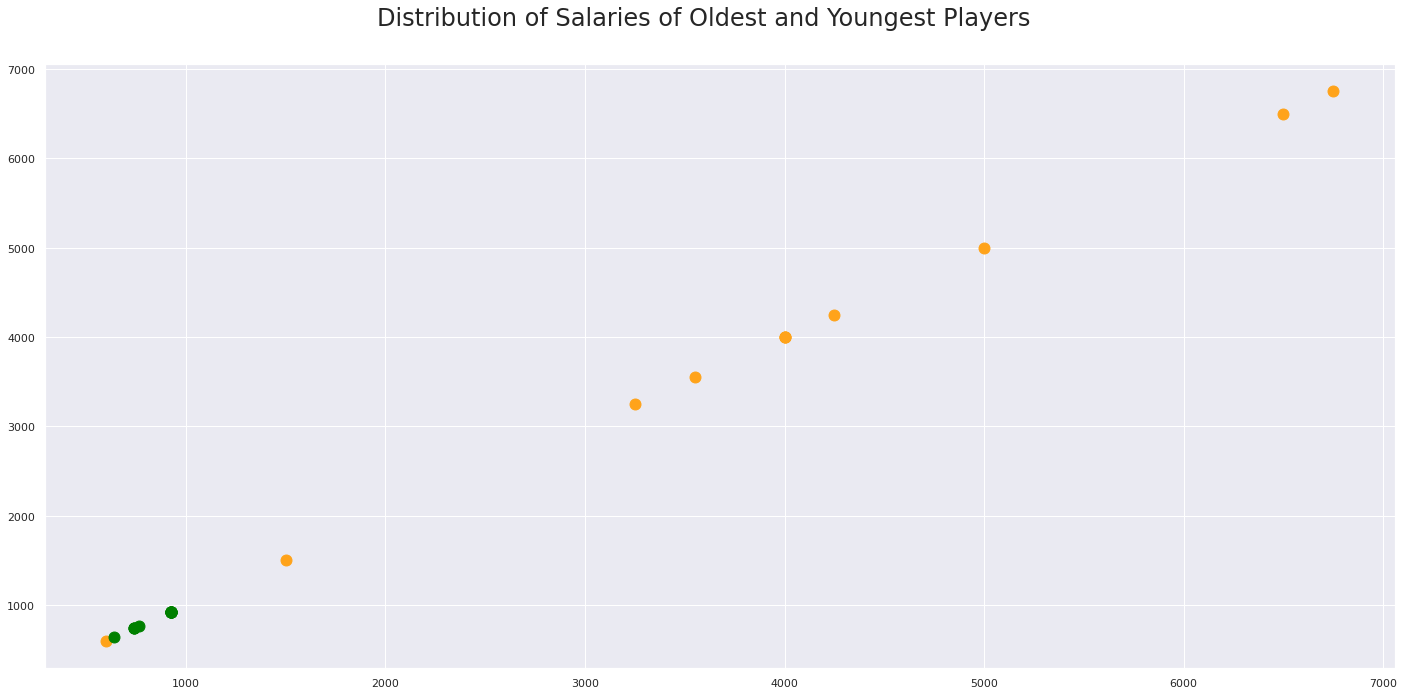

In [81]:
fig = plt.figure(figsize=(20,10))
f1 = plt.scatter(oldest_players_salaries, oldest_players_salaries, color='#ffa31a', s=120)
f2 = plt.scatter(youngest_players_salaries, youngest_players_salaries, color ='green', s= 120)
ax = fig.suptitle("Distribution of Salaries of Oldest and Youngest Players", size=24)
ax = fig.tight_layout(pad=2.0)

**Oldest people in the dataset have quite a spread of salaries but we can see that young people have a cap of salaries that they can get**

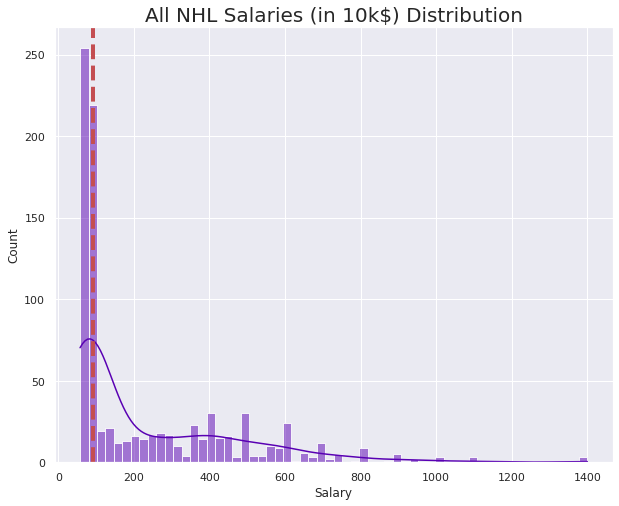

In [115]:
fig = plt.figure(figsize=(10,8))
graph = sns.histplot(all_data['Salary']/10000, kde=True, color='#5900b3', 
                  bins=60).set_title("All NHL Salaries (in 10k$) Distribution", size=20)

plt.axvline(x = 92.5, linewidth = 4, color = "r", linestyle = '--')

In [109]:
all_data['Salary'].median()

925000.0

The median salary is 925,000 which is a good amount but players can also make huge amount, as high as 14,000,000